In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dino = []
with open("Supplementary_file_1.tps") as tps:
    for line in tps:
        if line.startswith("LM"):
            n = int(line.split("=")[1])
            dino.append([tps.readline().split() for _ in range(n)])
dino = np.array(dino,dtype=float)
print(dino.shape)
print(dino)

(40, 56, 2)
[[[-0.2239387  -0.00467873]
  [-0.00400041  0.01890079]
  [ 0.13950268  0.03554054]
  ...
  [-0.2111725  -0.02459498]
  [-0.2175514  -0.0191774 ]
  [-0.22102842 -0.01141686]]

 [[-0.19489004 -0.01346524]
  [-0.01903753  0.01290461]
  [ 0.15523609  0.03183755]
  ...
  [-0.19074157 -0.02335167]
  [-0.19356453 -0.02089792]
  [-0.19478873 -0.0173382 ]]

 [[-0.19932954 -0.02708158]
  [-0.01443375  0.02375041]
  [ 0.14397822  0.02293491]
  ...
  [-0.19080644 -0.03437072]
  [-0.19343071 -0.03326732]
  [-0.19546997 -0.02873245]]

 ...

 [[-0.1972794   0.00554535]
  [-0.0353043   0.03192438]
  [ 0.15904984  0.03859086]
  ...
  [-0.18892356 -0.01717928]
  [-0.1935419  -0.00963857]
  [-0.19744561 -0.00208951]]

 [[-0.21443357 -0.01776574]
  [ 0.02056802  0.024779  ]
  [ 0.1437938   0.03388147]
  ...
  [-0.21412434 -0.03177495]
  [-0.21538442 -0.02779271]
  [-0.21566182 -0.02295031]]

 [[-0.1897072  -0.02411184]
  [-0.01412905  0.01172442]
  [ 0.15637842  0.01993309]
  ...
  [-0.187785

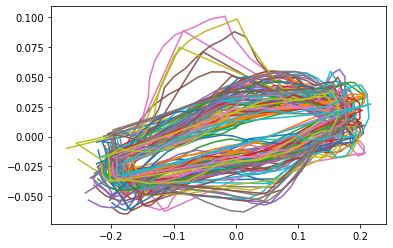

In [24]:
for entry in dino:
    plt.plot(entry[:,0],entry[:,1])
plt.show()

In [30]:
def msd2(a,b):
    distsq = (a**2).sum() + (b**2).sum()
    distsq -= np.linalg.svd(a.T@b,compute_uv = False).sum()
    return distsq / len(a)

D = np.zeros((len(dino),len(dino)))
for i1,d1 in enumerate(dino):
    for i2,d2 in enumerate(dino):
        D[i1,i2] = msd2(d1,d2)

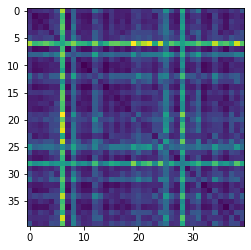

In [31]:
plt.imshow(D)
plt.show()

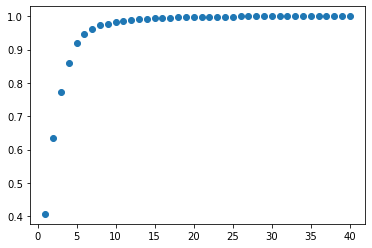

In [36]:
m = D.mean(axis = 0)
A = -0.5*(D-m[:,None] - m[None,:] + m.mean())

vals, vecs = np.linalg.eig(A)
order = vals.argsort()[::-1]
plt.scatter(np.arange(len(vals))+1, vals[order].cumsum()/vals.sum())
plt.show()

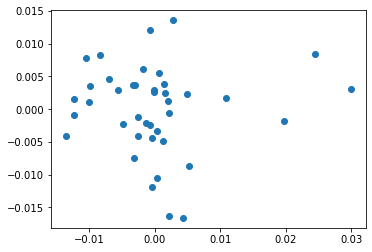

In [38]:
princo = vecs[:, order[:5]] * vals[order[:5]] **0.5

fig, ax = plt.subplots()
ax.set_aspect("equal")
plt.scatter(*princo[:,:2].T)
plt.show()

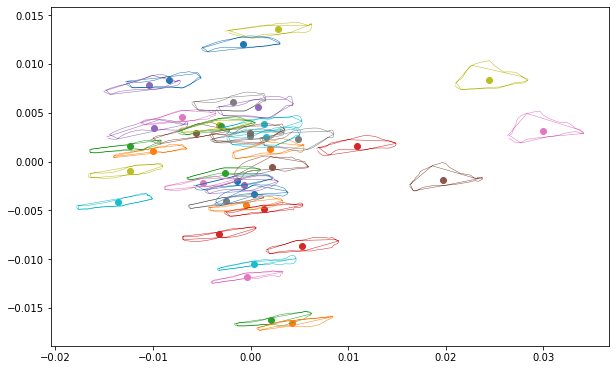

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_aspect("equal")
for din , xy in zip(dino,princo):
    plt.scatter(xy[0],xy[1])
    plt.plot(*(din/50 + xy[:2]).T,linewidth = 0.5)
plt.show()